In [3]:
## Author: Aloi Davide - PhD student - University of Birmingham 
# Data: MRI (T1s) scans with different brain tumors, downloaded from
# https://figshare.com/articles/dataset/brain_tumor_dataset/1512427. 
# There are 3 types of tumors: 1 for meningioma, 2 for glioma, 3 for pituitary tumor.
# Files are in .mat format so we'll have to use mat73 to read their content. 
# 

## Healthy MRI scans, still not used
# Healthy MRI scans http://brain-development.org/ixi-dataset/

import os 
import nilearn
import scipy
from fastai.vision.all import *
import mat73 
# Path to the tumor dataset
path = os.path.join('D:\\deep_learning_project\\project\\tumor_dataset\\dataset')
path

'D:\\deep_learning_project\\project\\tumor_dataset\\dataset'

There are 233 patients with brain tumors in the dataset.
82 are meningiomas, 89 are gliomas, 62 are pituitary tumors.


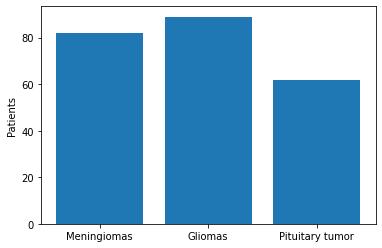

In [4]:
# displaying some info about the dataset 
PIDs = []
tumor_type = []
for file in os.listdir(path):
    data = mat73.loadmat(os.path.join(path,file))
    if not data['cjdata']['PID'] in PIDs:
        PIDs.append(data['cjdata']['PID'])
        tumor_type.append(int(data['cjdata']['label']))

import matplotlib.pyplot as plt
print(f'There are {len(PIDs)} patients with brain tumors in the dataset.')
print(f'{tumor_type.count(1)} are meningiomas, {tumor_type.count(2)} are gliomas, {tumor_type.count(3)} are pituitary tumors.')

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.bar(['Meningiomas', 'Gliomas', 'Pituitary tumor'],
        [tumor_type.count(1), tumor_type.count(2), tumor_type.count(3)])
plt.ylabel('Patients')
plt.show()

106665


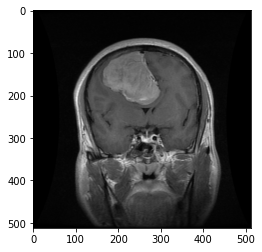

In [125]:
import mat73
import matplotlib.pyplot as plt

i = 300

data = mat73.loadmat(os.path.join(path, str(i) + '.mat'))
print(data['cjdata']['PID'])
plt.imshow(data['cjdata']['image'], cmap ='gray')
plt.show()


'106665'

In [6]:

def pathology(x): return x[0].isupper()

data = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=pathology, item_tfms=Resize([600,600], method = 'Squish'), do_crop = False, padding_mode = 'zeros')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [ ]:
learn = cnn_learner(data, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [ ]:
img = PILImage.create(test.data[0])
pathology,_,probs = learn.predict(img)
print(f"Pathology identified: {pathology}.")
print(f"Probability it's a tumor: {probs[1].item():.6f}")